In [2]:
from dataset.data import train_data
import dataset.preprocess as preprocess
import dataset.data as data
import dataset.simulation as simulation
import torch
import torch.nn.functional as F
import pandas as pd

def plot(pred, gt, xlim=None, ylim=(20, 40)):
    print(F.mse_loss(pred, gt))
    pd.DataFrame({
        'pred': pred,
        'gt': gt
    }, index = train_data.index[1:]) \
        .plot(
            figsize=(15, 4),
            xlim=xlim,
            ylim=ylim,
            grid=True
        )


tensor(4.1171)


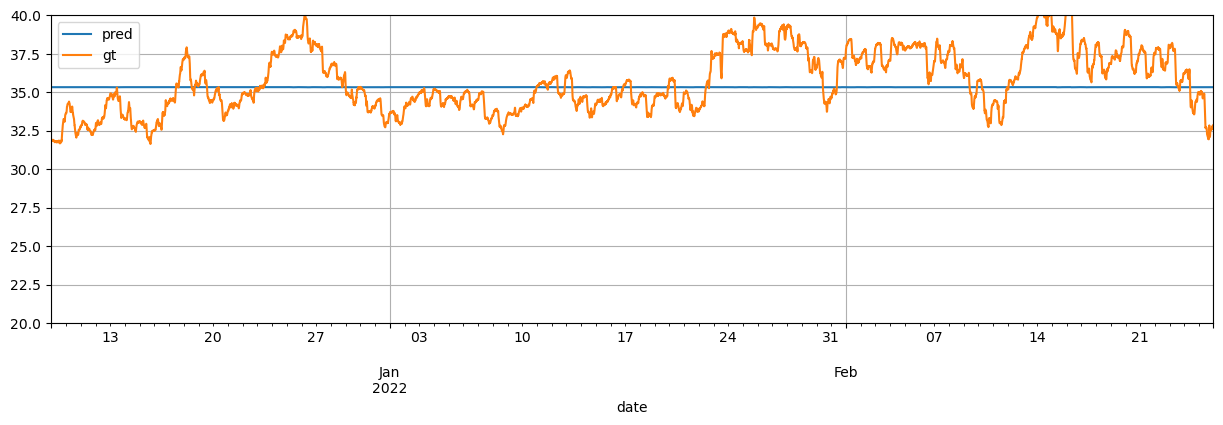

In [3]:
sec_back_t_model = simulation.MLPModel.load_from_checkpoint('lightning_logs/version_0/checkpoints/epoch=263-step=29304.ckpt')

sec_back_t_model.eval()
with torch.no_grad():    
    sec_back_t_pred = sec_back_t_model(preprocess.X_sec_back_t.to(sec_back_t_model.device)).cpu().squeeze()

plot(
    sec_back_t_pred,
    preprocess.y_sec_back_t,
    # xlim=('2022-1-1', '2022-1-2')
)


tensor(0.3348)


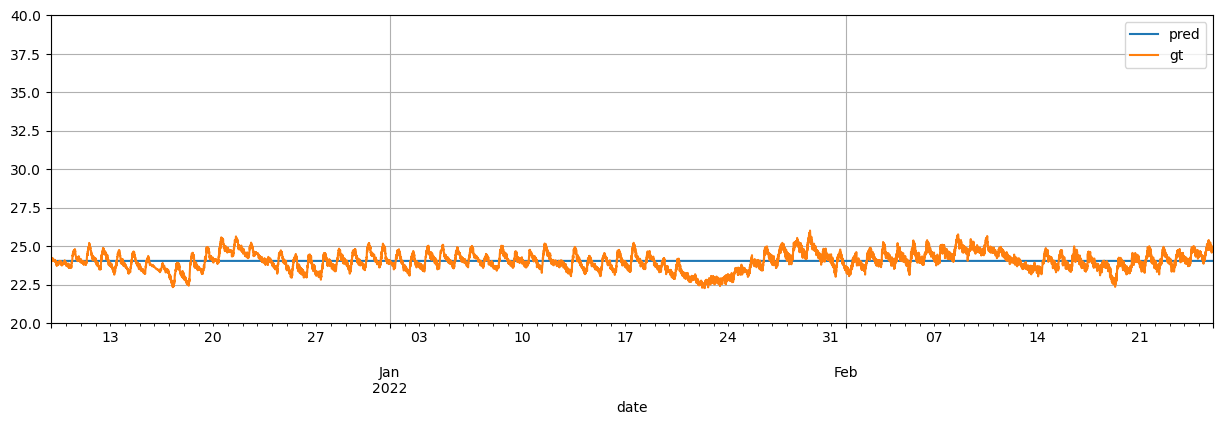

In [4]:
indoor_model = simulation.MLPModel.load_from_checkpoint('lightning_logs/version_6/checkpoints/epoch=682-step=75813.ckpt')

indoor_model.eval()
with torch.no_grad():    
    indoor_pred = indoor_model(preprocess.X_indoor.to(indoor_model.device)).cpu().squeeze()

plot(
    indoor_pred,
    preprocess.y_indoor,
    # xlim=('2022-1-1', '2022-1-2')
)


tensor(140.8957)
tensor(0.3350)


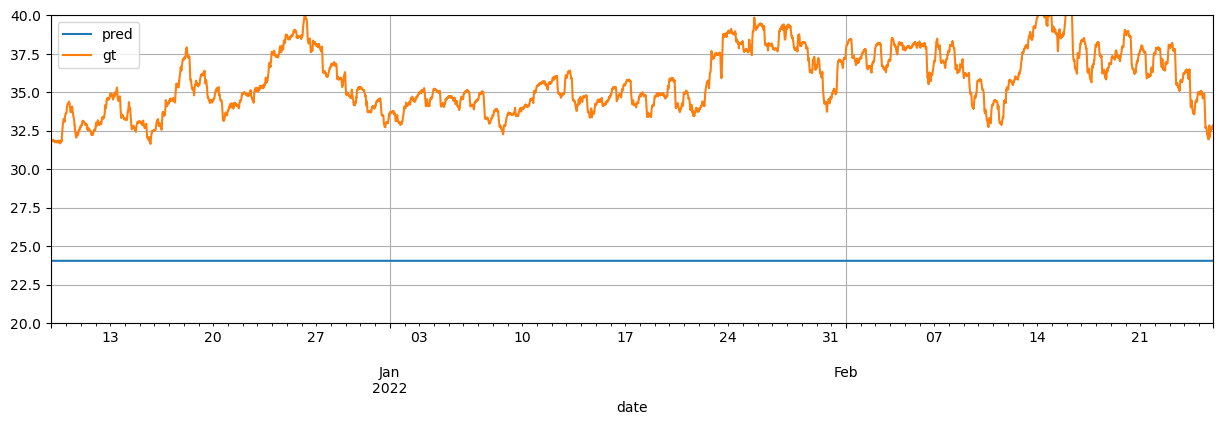

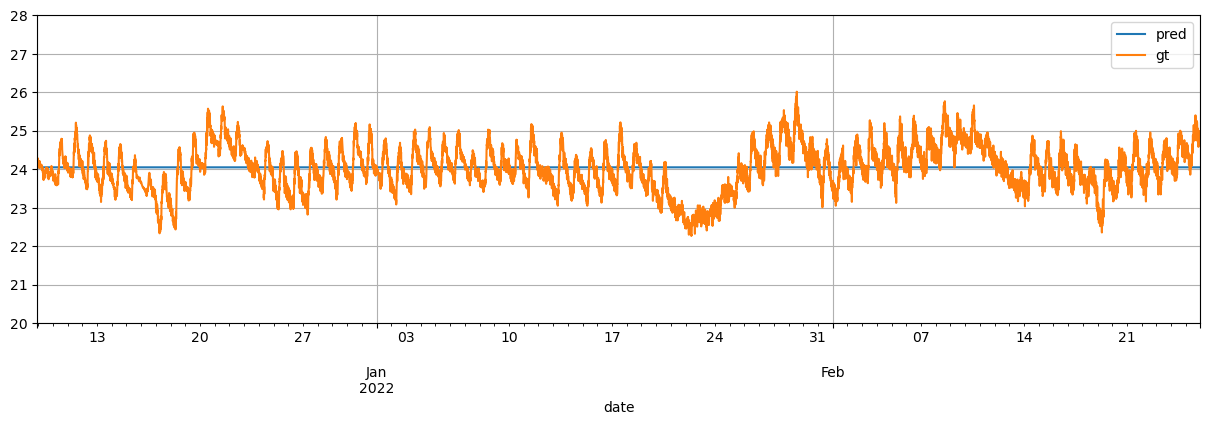

In [5]:

branch_model = simulation.BranchModel.load_from_checkpoint("lightning_logs/version_5/checkpoints/epoch=664-step=73815.ckpt")

branch_model.eval()
with torch.no_grad():    
    sec_back_t_pred, indoor_pred = branch_model(preprocess.X_branch.to(branch_model.device))
    sec_back_t_pred, indoor_pred = indoor_pred.cpu().squeeze(), indoor_pred.cpu().squeeze()

plot(
    sec_back_t_pred,
    preprocess.y_sec_back_t,
    # xlim=('2022-1-1', '2022-1-2')
)

plot(
    indoor_pred,
    preprocess.y_indoor,
    # xlim=('2022-1-1', '2022-1-2'),
    ylim=(20, 28)
)